# TASK-4 To Explore Decision Tree Algorithm

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\SADDAL\Documents\Iris.csv", header=0)

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Information of Datasets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Since there are no NULL values we move to next part 

## Visualization

### Plot between Length and width of petal

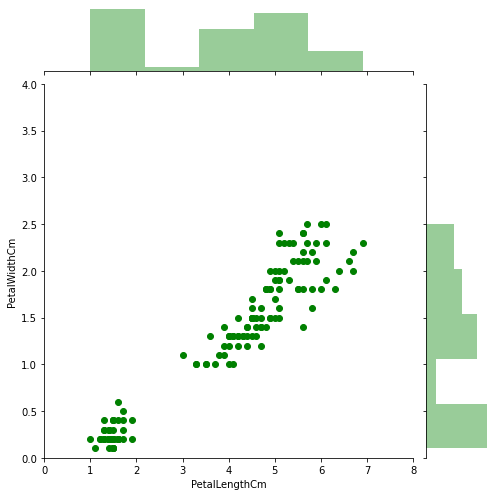

In [6]:
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=df,kind="scatter",xlim=(0, 8), ylim=(0, 4),color="g", height=7)

### Sepal length variation

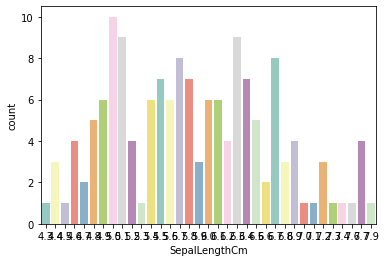

In [7]:
sns.countplot(x="SepalLengthCm",data=df,color="m",palette="Set3")

## Dummy variable creation

In [8]:
#changing categorical variables into numerical variables
df1 = pd.get_dummies(df, columns = ["Species"])

In [9]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


## X-Y Split

In [10]:
#removing dependant variable
X=df.drop(["Id","Species"], axis=1)
type(X)

pandas.core.frame.DataFrame

In [11]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
X.shape

(150, 4)

In [13]:
Y=df["Species"]
type(Y)

pandas.core.series.Series

In [14]:
Y.shape

(150,)

## Test-Train Split

In [15]:
#testing our model on real life data
from sklearn.model_selection import train_test_split

In [16]:
#train dataset is used to fit the machine learning model
#test dataset is used to evaluate the fit machine learning model(prediction)
#random state is initialized to 0 so as to get the same dataset everytime
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [17]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [18]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


## Training Classification Tree

In [19]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [20]:
#object to predict values of Y using our X train and expressed variable
clftree.fit(X_train, Y_train)

DecisionTreeClassifier()

## Predict values using Trained model

In [21]:
#predicting values
Y_train_pred = clftree.predict(X_train)
Y_test_pred = clftree.predict(X_test)

In [22]:
#predicted values
Y_test_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

## Model Performance

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
confusion_matrix(Y_train, Y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

In [25]:
confusion_matrix(Y_test, Y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [26]:
accuracy_score(Y_test, Y_test_pred)

1.0

### Plotting Confusion matrix

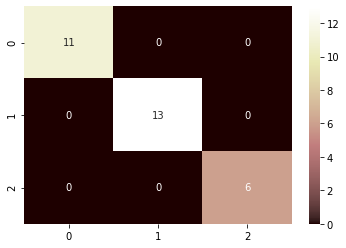

In [27]:
sns.heatmap(confusion_matrix(Y_test, Y_test_pred),annot= True,cmap="pink")

## Plotting Decision Tree

In [28]:
#created dot file converted into image and used the image to plot graph
dot_data = tree.export_graphviz(clftree,feature_names=X_train.columns, out_file = None, filled= True)

In [29]:
from IPython.display import Image
import pydotplus

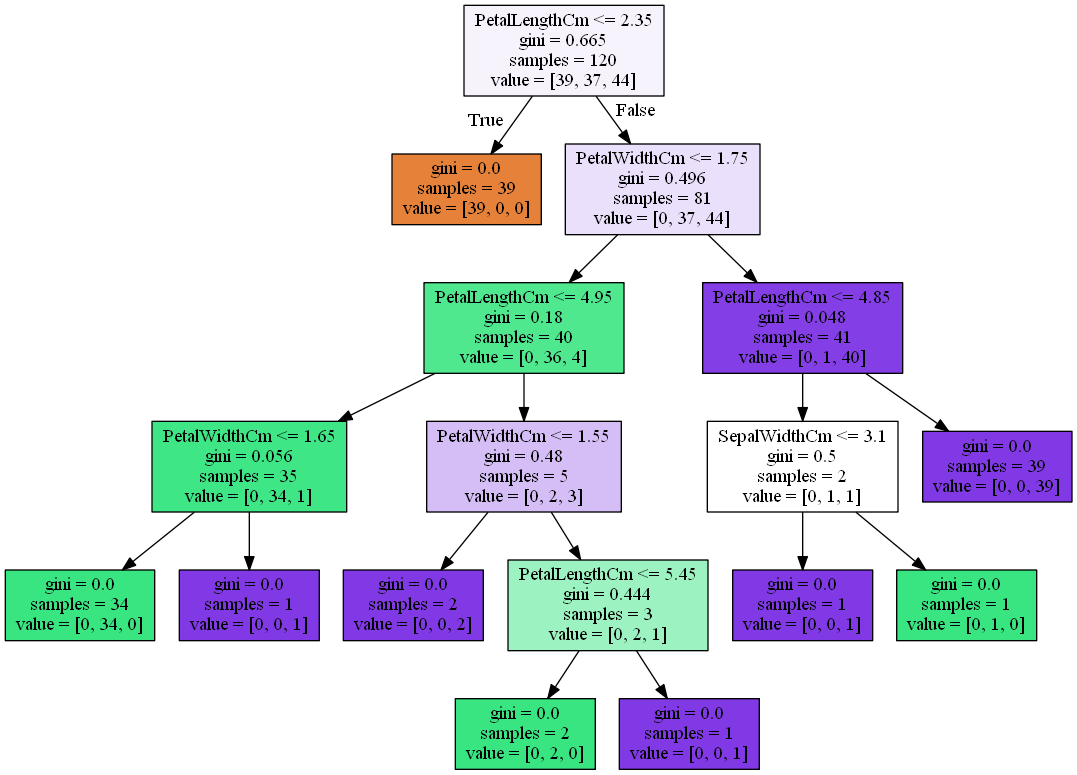

In [30]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly